**CONTEXT:**

Whenever I come across a survey data(read kaggle 2018 survey, stackoverflow survey) two things I can confidently say, `first- percent of Male respondents will be much higher than the female respondents` and `second- top 2 countries represented will be India and USA` . While I cannot explain why the gender ratio is skewed in tech, but when it comes to top countries represented in this survey, questions like following have always intrigued me,

`1. large number of people from India and USA is due to high interest or it's just high population?` 

`2. Does that mean countries with more respondents are more engaged and countries with less respondents have less interest in DS, Kaggle or this survey?`

`3. How do we find which country is more engaged? Can we even do that?`

The top 10 countries represented in the Kaggle 2019 survey are India, USA, Brazil, Japan, Russia, China, Germany, UK, Canada and Spain is no news to us. We also know that around 40% of the kaggle population belong to India(24%) and USA(16%), which is quite good and I am happy about it. It's good to see the dominance of these two countries in every single survey data I have encountered till date. `So, does that mean that the top countries represented in the chart are more engaged in data science and kaggle as compared to the other countries?`

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
df = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')
df_pop = pd.read_csv('/kaggle/input/world-population-data-2018/world_population_2018.csv')

df = df.drop(0)
df.head()
#df['Q3'] = df['Q3'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'UK & IR')
#df['Q3'] = df['Q3'].replace(['Hong Kong (S.A.R.)'], 'China')
df['Q3'] = df['Q3'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK & IR', 
                             'Iran, Islamic Republic of...': 'Iran', 'Viet Nam': 'Vietnam', 
                             'United States of America': 'USA'})


df_pop['Country Name'] = df_pop['Country Name'].replace({'Hong Kong SAR, China': 'Hong Kong (S.A.R.)', 
                                         'United Kingdom': 'UK & IR', 'Korea, Rep.': 'Republic of Korea',
                                        'Korea, Dem. People’s Rep.': 'North Korea',
                                         'Iran, Islamic Rep.': 'Iran', 'United States': 'USA', 
                                        'Egypt, Arab Rep.': 'Egypt', 'Russian Federation': 'Russia'})

Let's take a look at the chart below, the kaggle population from countries like Saudi Arabia, Norway, New Zealand, Austria, Denmark are less. At the first glance it's easier to assume that India and USA are the highest contributing countries but we also know that the population of India(much higher) and USA(higher) is more than other countries represented in this survey. I believe, high number of people from a particular country does not necessarily mean that they are more interested in a service/ product and it's better to distinguish between `most engaged` and `least engaged` population in order to have a fair analysis. Based on the scope of our analysis we may want to weight our data by population in order to see the engagement level of a country. But how do we do that?

In [ ]:
colors = ['silver',] * 59
colors[-2:] = ['crimson' for i in colors[-2:]]
    
df['Q3'].value_counts(normalize = True).sort_values().plot(kind='barh', figsize=(15,15), color = colors, rot=0)

plt.xlabel("Percent", labelpad=14, fontsize=20)
plt.ylabel("Countries", labelpad=14, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Percent of Countries", y=1.02, fontsize=25)

**THE INSPIRATION:**

I came accross this excellent article in the U.S. General Services Administration website digital.gov, where the writer Kelly Holden tries to weight the data by population while figuring out if sessions within an area are higher due to more interest, or a larger population. More can be read about in the link below and I highly recommend doing that,

https://digital.gov/2016/03/11/seeing-states-the-right-way-how-to-weigh-data-by-population/

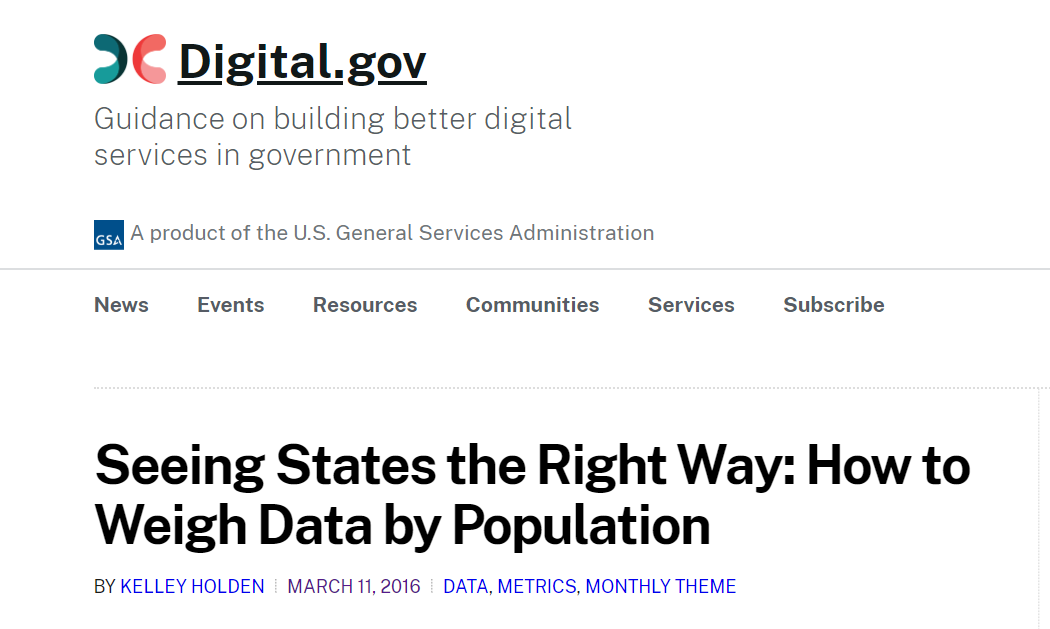

This lead me to find out more about the population of the countries represented in the kaggle survey. 

In the next plot I have checked the population data of the countries represented in the Kaggle survey. The population survey data of 2018 shows that China, India, USA are the most populated countries in the world. It seems like extremely high population is skewing the numbers here atleast for some countries if not all.  

In [ ]:
df_country = df[['Q3', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q11', 'Q15' ]]
df1 = df_country.groupby(['Q3'])['Q3'].count().to_frame('count').reset_index()

#merge with population

df_merge = pd.merge(df1, df_pop, left_on = 'Q3', right_on = 'Country Name')

df_merge= df_merge.sort_values('pop_2018', ascending = False)

#plt.figure(figsize=(20,15))
#sns.set_color_codes("muted")
#sns.barplot(x="pop_2018", y="Country Name", data=df_merge)

In [ ]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
fig = px.bar(df_merge.sort_values('pop_2018',ascending = False), y="pop_2018", x="Country Name", hover_data=["pop_2018"])
fig.update_layout(title="2018 Population of Countries",
                  xaxis_title="Country",
                  yaxis_title="Population2018", xaxis_tickangle=-45)
fig.show()

We can clearly see that population is not affecting the number of respondents from China. But for India and USA it seems like population may have some effects. 

In [ ]:
import plotly.express as px
#data = px.data.df_merge()
fig = px.scatter(df_merge, x="pop_2018", y="count", color="count",
                  size='pop_2018', hover_data=['Country Name'])
fig.update_layout(title="Country Population Vs. Kaggle survey population",
                  xaxis_title="Country Population",
                  yaxis_title="Survey population")
fig.show()

**THE METHOD:**

In order to find out the most engaged countries in this survey, I tried to normalize the `kaggle population (respondents in the survey data)` with the population data of these countries. 1 million (1,000,000) is the order of magnitude of the country with the lowest population. So, with the formula below, I calculated the number of kaggle respondents each country produces for every 1 million people. 

`(kaggle_population_in_numbers/population_of_the_country)*1000000`

This approach may be one of the many ways we can explain engagement factor of a country. I am sure there are many. 

**THE INSIGHTS:**

The plot below shows the `total number of respondents` from a country `for every 1 million people` in that particular country.  

A real quick view of the most engaged countries shows us that `Singapore, Ireland, Canada, Israel, Switzerland` are the most engaged countries in this kaggle survey. In order to interprete this, we can say that ```for every 1 million people, Singapore produces around 28 Data enthusiasts```. The top 3 countries in terms of Kaggle population India, USA and Brazil produce 4, 9 and 3 data enthusiasts for every 1 million people. If we go by this calculation then USA is the 15th most engaged country in the survey and India and Brazil are somewhere in the middle around 30ish position.

One thing to notice here is that China produces none may be close to 1 respondent per 1 million people and Hong Kong at 9 respondents fares much better in this aspect. 

While to weight or not to weight with population is solely dependent on the scope of your analysis. I have decided to filter out top 15 `most engaged countries` and `least 15 engaged countries` and analyze the traits of these countries using the questions provided in this survey. 

In [ ]:
df_merge['per_1M'] = round((df_merge['count']/df_merge['pop_2018'])*1000000, 0)
df_merge= df_merge.sort_values('per_1M', ascending = False).drop(columns = ['Q3'])
#df_merge

In [ ]:
colors = ['silver',] * 59
colors[14] = 'crimson'
colors[31] = 'crimson'

plt.figure(figsize=(15,15))
ax = sns.barplot(y="Country Name", x="per_1M", data=df_merge, palette = colors)
plt.xlabel("Number of respondents per million", labelpad=14, fontsize=20)
plt.ylabel("Countries", labelpad=14, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title("Number of respondents per million", y=1.02, fontsize=25)

**THE ACTION: **

Now that I know the top 15 most engaged countries and 15 least engaged countries in Kaggle 2019 survey, I am going to explore few more attributes of these two categories of respondents. 

In [ ]:
top_15 = df[df['Q3'].isin(['Singapore','Ireland', 'Canada', 'Israel', 
                            'Switzerland', 'Portugal', 'Australia', 
                            'New Zealand', 'Greece', 'Norway', 'Denmark', 
                            'USA', 'Netherlands', 'Spain', 'Hong Kong (S.A.R)'])]

In [ ]:
least_15 = df[df['Q3'].isin(['China','Indonesia', 'Philippines', 'Bangladesh', 
                            'Thailand', 'Pakistan', 'Egypt', 
                            'Iran', 'Vietnam', 'Republic of Korea', 'Algeria', 
                            'Saudi Arabia', 'Kenya', 'Nigeria', 'South Africa'])]

**GENDER:**

Well I admit, I was hoping for a mircale here and find out that the women reprsentation is more in any one of the category but it's not, may be I am too optimistic. Let's move on to the next plot. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)


top_15['Q2'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(15, 10))
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14, fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_title("Gender in most engaged", y=1.02,fontsize=20)

least_15['Q2'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(15, 10))
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14, fontsize=20)
ax2.tick_params(labelsize=15)
ax2.set_title("Gender in least engaged", y=1.02,fontsize=20)

**AGE:**

We can definitely note the difference here,in least engaged countries `18-21` year olds are around 15% as against 5% in `most_engaged` countries. 30% of respondents are `22-24` year olds in the least engaged countries, or we can say that the younger generations are leading the way in data science in these countries. Whereas, in most engaged countries, age groups 25 and above rule the most. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)

colors = ['silver',] * 11
#colors[-3:] = ['crimson' for i in colors[-3:]]
colors[3] = 'green'

top_15['Q1'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(15, 10), color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("Age", labelpad=14, fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_title("Age in most_engaged", y=1.02,fontsize=20)


colors = ['silver',] * 11
colors[8] = 'green'
least_15['Q1'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(15, 10), color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("Age", labelpad=14, fontsize=20)
ax2.tick_params(labelsize=15)
ax2.set_title("Age in least_engaged", y=1.02,fontsize=20)

**EDUCATION:**

More than `20%` of the respondents from the most engaged countries are PHD holders, whereas `10%` of the respondents from least engaged countries hold PHD degree. Overall Master's degree holders are more in both categories but around 35% of the respondents in least engaged countries are Bachelor's degree holders. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)

colors = ['silver',] * 7
colors[4] = 'green'
top_15['Q4'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)

ax1.set_xlabel("Percent", labelpad=14, fontsize=35)
ax1.set_ylabel("Education", labelpad=14, fontsize=35)
ax1.tick_params(labelsize=40)
ax1.set_title("Education in top15", y=1.02,fontsize=35)


colors = ['silver',] * 7
colors[4] = 'green'
least_15['Q4'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)

ax2.set_xlabel("Percent", labelpad=14, fontsize=35)
ax2.set_ylabel("Education", labelpad=14, fontsize=35)
ax2.tick_params(labelsize=40)
ax2.set_title("Education in least15", y=1.02,fontsize=35)

**JOB TITLE:**

The percent of `students` in the least engaged countries is around `15% higher than the most engaged countries`. Now this explains the age phenomenon above, where we found that 18-22 year olds are higher in case of least engaged countries. It's heartening to see that the youngsters have taken up the batton in least engaged countries. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)

colors = ['silver',] * 12
colors[10] = 'yellow'
top_15['Q5'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 29), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14, fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_title("Job title in most_engaged", y=1.02,fontsize=25)


colors = ['silver',] * 12
colors[11] = 'yellow'
least_15['Q5'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14, fontsize=20)
ax2.tick_params(labelsize=20)
ax2.set_title("Job title in least_engaged", y=1.02,fontsize=25)

**COMPANY SIZE:**

Now we have some big revelations here too, the company size where our respondents work in their respective countries is quite the opposite. In case of `most engaged` countries around `25%` of the respondents work in `big corporations(>10,000 employees)`, whereas in least engaged countries the category `>10,000` comes last with around `12%` of the respondents. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)


colors = ['silver',] * 5
colors[4] = 'orange'
top_15['Q6'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14, fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_title("Company size in most_engaged", y=1.02,fontsize=25)


colors = ['silver',] * 5
colors[0] = 'orange'
least_15['Q6'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14, fontsize=20)
ax2.tick_params(labelsize=20)
ax2.set_title("Company size in least_engaged", y=1.02,fontsize=25)

**ML MODELS:**

Well this question now fits the bill and explains why some countries are most engaged and some are least engaged. I expect that most engaged countries must have experience in using ML models etc. Around `45-50%` of the respondents in the `most engaged` countries have answered that they have been using ML models from past 2 years or have already started using ML models recently. The scenario is quite opposite in least engaged countries where `around 50%` of respondents say they are yet to use any ML models. 



In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)


colors = ['silver',] * 6
colors[-2:] = ['plum' for i in colors[-2:]]
top_15['Q8'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(30, 30), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=40)
ax1.set_ylabel("", labelpad=14, fontsize=40)
ax1.tick_params(labelsize=40)
ax1.set_title("ML methods in most_engaged", y=1.02,fontsize=40)


colors = ['silver',] * 6
colors[-2:] = ['plum' for i in colors[-2:]]
least_15['Q8'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=40)
ax2.set_ylabel("", labelpad=14, fontsize=40)
ax2.tick_params(labelsize=40)
ax2.set_title("ML methods used in least_engaged", y=1.02,fontsize=40)

**SALARY:**

Now our next burning topic is Salary. `Around 40%` of the respondents from `most engaged` countries earn between `100K-200K per year`, which is quite intuitive when we see their age group, organization size and experience in ML. We also know that `students comprise of most percent in least engaged countries` so I would expect the salaries to be less, but looks like it's uncomparable in both the cases. Well in my opinion, the Salaries are one attribute that require another round of normalization against the purchase parity, cost index and economic growth of a particular country. So, I would leave it upto my reader's imagination on how to interprete this drastic salary differences, however wild it may be.

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)

colors = ['silver',] * 25
colors[-3:] = ['violet' for i in colors[-3:]]
top_15['Q10'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14)
ax1.tick_params(labelsize=20)
ax1.set_title("Salary in most_engaged", y=1.02,fontsize=20)


colors = ['silver',] * 25
colors[-2:] = ['violet' for i in colors[-2:]]
least_15['Q10'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14)
ax2.tick_params(labelsize=20)
ax2.set_title("Salary in least_engaged", y=1.02,fontsize=20)

**MONEY SPENT ON ML:**

While `30-35%` of the respondents in both the categories say that they have spent `$0 USD in ML products`, but the situation becomes quite opposite in both the categories afterwards. Spending in ML products in most engaged categories is huge as compared to least engaged countries. See for yourself. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)

colors = ['silver',] * 6
colors[-2] = 'limegreen'
top_15['Q11'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14)
ax1.tick_params(labelsize=20)
ax1.set_title("ML spending in most_engaged", y=1.02,fontsize=20)

colors = ['silver',] * 6
colors[-2] = 'limegreen'
least_15['Q11'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14)
ax2.tick_params(labelsize=20)
ax2.set_title("ML spending in least_enaged", y=1.02,fontsize=20)

**EXPERIENCE IN WRITING CODE TO ANALYZE DATA:**

Most engaged countries have been writing code since long, they have more experience in writing code for data analysis as compared to the least engaged countries. 

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)


colors = ['silver',] * 7
colors[4] = 'c'
colors[6] = 'c'
top_15['Q15'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14)
ax1.tick_params(labelsize=20)
ax1.set_title("coding experience in most_engaged", y=1.02,fontsize=20)



colors = ['silver',] * 7
colors[4] = 'c' 
least_15['Q15'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax2.set_xlabel("Percent", labelpad=14, fontsize=20)
ax2.set_ylabel("", labelpad=14)
ax2.tick_params(labelsize=20)
ax2.set_title("coding experience in least_engaged", y=1.02,fontsize=20)

**PROGRAMMING LANGUAGES:**

I was not expecting much difference when it comes to using programming languages. Python, SQL and R are most used languages everywhere. But, `Bash` users are slightly higher in most engaged countries. 

In [ ]:
Q18 = df[['Q3','Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4','Q18_Part_5', 'Q18_Part_6',
            'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12']]

Q18_melt = pd.melt(Q18, id_vars=['Q3'], 
        value_vars=['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4','Q18_Part_5', 'Q18_Part_6',
            'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12'], 
        value_name='favorite programming languages do you use on a regular basis')

Q18_melt = Q18_melt.drop('variable', axis = 1)
Q18_melt.head()

Q18_melt_cat1 = Q18_melt[Q18_melt.Q3 .isin(['Singapore','Ireland', 'Canada', 'Israel', 
                            'Switzerland', 'Portugal', 'Australia', 
                            'New Zealand', 'Greece', 'Norway', 'Denmark', 
                            'USA', 'Netherlands', 'Spain', 'Hong Kong (S.A.R)'])]

Q18_melt_cat2 = Q18_melt[Q18_melt.Q3 .isin(['China','Indonesia', 'Philippines', 'Bangladesh', 
                            'Thailand', 'Pakistan', 'Egypt', 
                            'Iran', 'Vietnam', 'Republic of Korea', 'Algeria', 
                            'Saudi Arabia', 'Kenya', 'Nigeria', 'South Africa'])]


#fig, (ax1, ax2) = plt.subplots(1, 2)
fig = plt.figure()

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(224)


colors = ['silver',] * 11
colors[8] = 'c'
Q18_melt_cat1['favorite programming languages do you use on a regular basis'].value_counts(normalize=True).sort_values().plot(ax = ax1, kind='barh', figsize=(20, 20), rot=0, color = colors)
ax1.set_xlabel("Percent", labelpad=14, fontsize=20)
ax1.set_ylabel("", labelpad=14)
ax1.tick_params(labelsize=20)
ax1.set_title("programming language in most engaged", y=1.02,fontsize=20)


colors = ['silver',] * 11
colors[3] = 'c'
Q18_melt_cat2['favorite programming languages do you use on a regular basis'].value_counts(normalize=True).sort_values().plot(ax = ax2, kind='barh', figsize=(20, 20), rot=0, color = colors)
plt.xlabel("Percent", labelpad=14, fontsize=20)
plt.ylabel("", labelpad=14)
ax2.tick_params(labelsize=20)
plt.title("programming language in least engaged", y=1.02,fontsize=20)

**CONCLUSION:**

The main `intention` of this analysis is to present a `fresh perspective` when we view the `country level participation in this survey`. While there may be `many more efficient ways to determine the data science engagement level of a Country`, here, I have just tried to determine that by `weighting the survey data by population` and found some `stark differences between these two categories(most and least engaged countries)`. In my analysis, the `engagement level may vary year by year` and it depends on the `population of the country and the number of respondents` from a country who chose to participate in this survey. I would `recommend` finding some more plausible ways to `weigh the data`. Please feel free to change the terminology for 'most_engaged' and 'least_engaged' countries as well (I am rooting for underdogs and dark horses) . 

References:
1. https://data.worldbank.org/indicator/SP.POP.TOTL
2. https://digital.gov/2016/03/11/seeing-states-the-right-way-how-to-weigh-data-by-population/
3. https://plot.ly/python/plotly-express/